# Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit -- profit of each state in the past few years 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [ ]:
#Load the data
data = pd.read_csv("/content/drive/MyDrive/Assignment/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


**EDA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


**Check for Null Values**

In [ ]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Inference: The given table as zero non null values hence value imputation is not required

**Rename**

In [ ]:
data1=data.rename({"R&D Spend": "RD", "Administration" : "Admin", "Marketing Spend": "Mks"},axis=1)
data1.drop(columns="State",inplace=True)
data3=data1.copy()
data1.head()

,RD,Admin,Mks,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
#check rows & columns 
data1.shape

(50, 4)

In [ ]:
#Check duplicates
data1[data1.duplicated()].shape

(0, 4)

In [ ]:
data1.corr()

,RD,Admin,Mks,Profit
RD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Mks,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


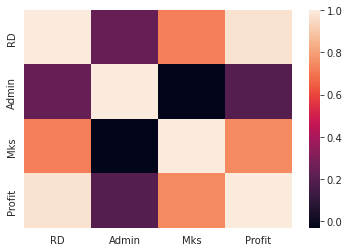

In [ ]:
# Check for correlation
sns.heatmap(data1.corr())

*  RD has strongest +ve corr with Profit i.e if RD value   

* increase then Price will increase -> MKS has strongest +ve corr with Profit i.e if MKS value increase then Price will increase -> Admin and Profit has weak +ve correlation

*  RD has strong +ve corr with MKS i.e if Age value increase then Price will increase -> Admin and MKS has weak -ve correlation

*  Admin and RD has strong +ve correlation

**Scatterplot between variable along with histograms**

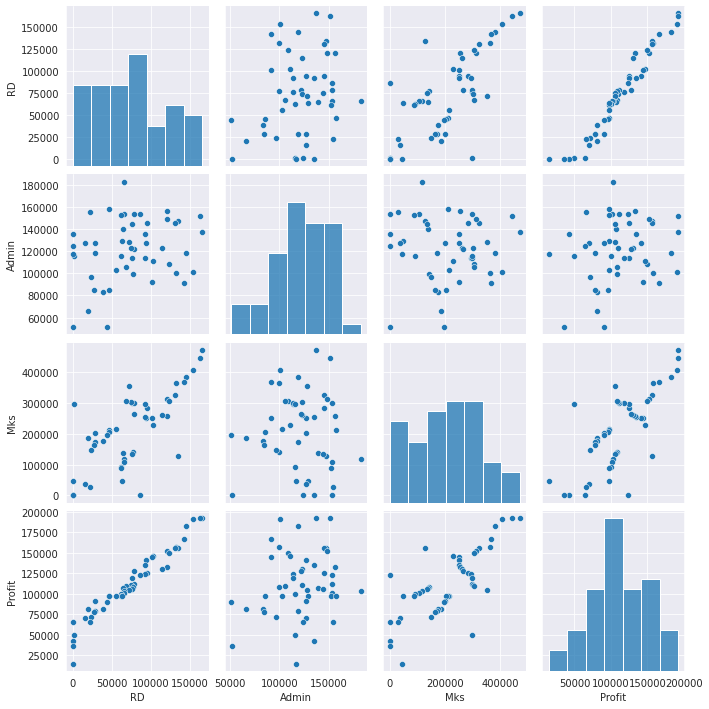

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data1)

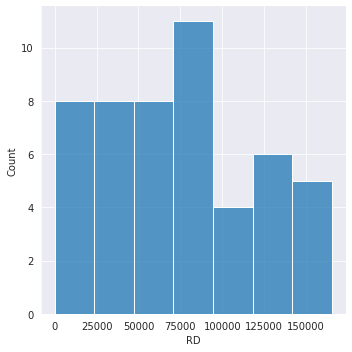

In [ ]:
# Visulization of data 
sns.displot(data1["RD"])

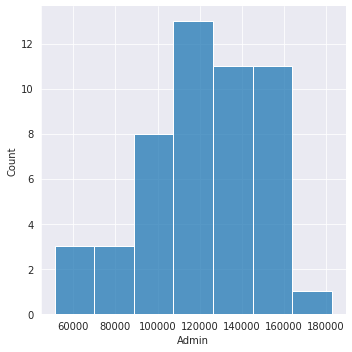

In [ ]:
sns.displot(data1["Admin"])

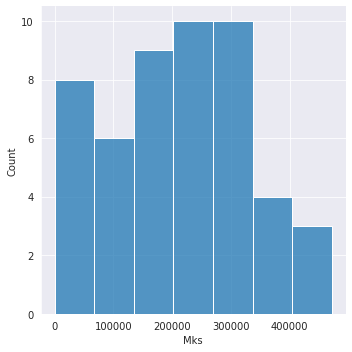

In [ ]:
sns.displot(data1["Mks"])

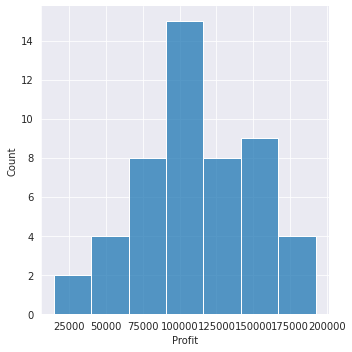

In [ ]:
sns.displot(data1["Profit"])

# *METHOD1:USING OLS*

**Preparing a model**

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols('Profit~RD+Admin+Mks',data=data1).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           4.53e-30
Time:                        13:58:59   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Mks            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print(f"Rsquared: {model.rsquared}\nRsquared_adjusted:{model.rsquared_adj}")

Rsquared: 0.9507459940683246
Rsquared_adjusted:0.9475337762901719


In [ ]:
model.pvalues

Intercept    1.057379e-09
RD           2.634968e-22
Admin        6.017551e-01
Mks          1.047168e-01
dtype: float64

Inference
P-value -> if p value<0.05 -> significant -> if p value>0.05 -> insignificant

* Admin has p-val =0.60176 >0.05 which is highly insignificant and least impactful -> MKS has p-val =0.10472 >0.05 which is insignificant and least impactful

* RDS has p-value <0.05 which is significant

(Admin,MKS) ------> INSIGNIFICANT

 (RDS)------> SIGNIFICANT

Simple Linear Regression Models
Build SLR and MLR models for insignificant variables 'Admin' and 'MKS'
Also finding their tvalues and pvalues
SLR FOR Admin 


In [ ]:
slr_a=smf.ols("Profit~Admin",data=data1).fit()
# t and p values
print(slr_a.pvalues, '\n', slr_a.tvalues)

Intercept    0.003824
Admin        0.162217
dtype: float64 
 Intercept    3.040044
Admin        1.419493
dtype: float64


Interfence : 
Admin has significient pvalue0.162217>0.05

In [ ]:
#SLR for MKS
slr_m=smf.ols("Profit~Mks",data=data1).fit()
# t and p values
print(slr_m.pvalues, '\n', slr_m.tvalues)

Intercept    4.294735e-10
Mks          4.381073e-10
dtype: float64 
 Intercept    7.808356
Mks          7.802657
dtype: float64


MKS has significient pvalue

In [ ]:
#for both admin and mks

ml_am=smf.ols('Profit~Admin+Mks',data = data1).fit() 
#t and p-Values
print(ml_am.pvalues, '\n', ml_am.tvalues) #result are significant

Intercept    2.589341e-01
Admin        1.729198e-02
Mks          9.727245e-11
dtype: float64 
 Intercept    1.142741
Admin        2.467779
Mks          8.281039
dtype: float64


In [ ]:
ml_am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           2.50e-10
Time:                        13:58:59   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Admin          0.3237      0.131      2.468      0.017       0.060       0.588
Mks            0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Calculating VIF (Measeure Multi colinearity)**
**Vif should be low as possible (<5)**

In [ ]:
data1.head()

,RD,Admin,Mks,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables
m_rd=ols(formula="RD~Mks+Admin",data=data1).fit().rsquared
v_rd=1/(1-m_rd)
m_ad = ols(formula="Admin~RD+Mks",data=data1).fit().rsquared
v_ads = 1/(1-m_ad)
m_mks = ols(formula="Mks~Admin+RD",data=data1).fit().rsquared
v_mks = 1/(1-m_mks)

In [ ]:
pd.DataFrame({"features":["RD","Admin","Mks"],"VIF":[v_rd,v_ads,v_mks]})

,features,VIF
0,RD,2.468903
1,Admin,1.175091
2,Mks,2.326773


2)Residual Analysis

**Test for Normality of Residuals**

Text(0.5, 1.0, 'Normal Q-Q plot of residuals')

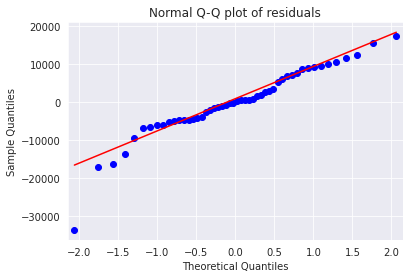

In [ ]:
qqplot = sm.qqplot(model.resid,line="q")
plt.title("Normal Q-Q plot of residuals")

In [ ]:
list(np.where(model.resid>15000))# outlier detection from above QQ plot of residuals

[array([36, 45])]

In [ ]:
list(np.where(model.resid<-30000))# outlier detection below -6000

[array([49])]

In [ ]:
data1['Predicted']= model.fittedvalues  #Predicted Value
data1['Error']= model.resid             #Errors
data1

,RD,Admin,Mks,Profit,Predicted,Error
0,165349.20,136897.80,471784.10,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,166187.94,172139.514183,-5951.574183
5,131876.90,99814.71,362861.36,156991.12,163580.780571,-6589.660571
6,134615.46,147198.87,127716.82,156122.51,158114.096669,-1991.586669
7,130298.13,145530.06,323876.68,155752.60,160021.363048,-4268.763048
8,120542.52,148718.95,311613.29,152211.77,151741.699699,470.070301
9,123334.88,108679.17,304981.62,149759.96,154884.684110,-5124.724110


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


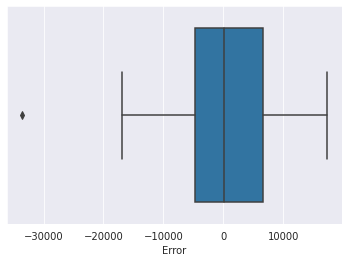

In [ ]:
#Boxplot
sns.boxplot(data1["Error"])

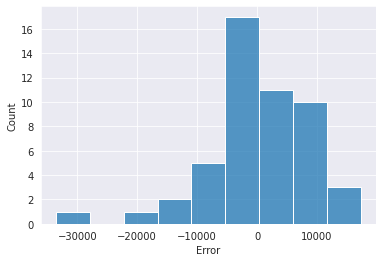

In [ ]:
#hist
sns.histplot(data1["Error"])

**Residual Plot For Homoscedasticity**

* Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

In [ ]:
def sv(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

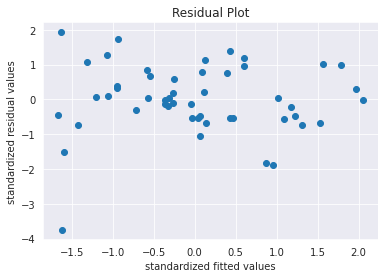

In [ ]:
plt.scatter(sv(model.fittedvalues),sv(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In the above scatter plot of fitted and residual values -->no pattern -->0 correlation Same is the case here, hence it is a good model.

**Residual Vs Regressors**

In [ ]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)  
# exog = x-variable & endog = y-variable

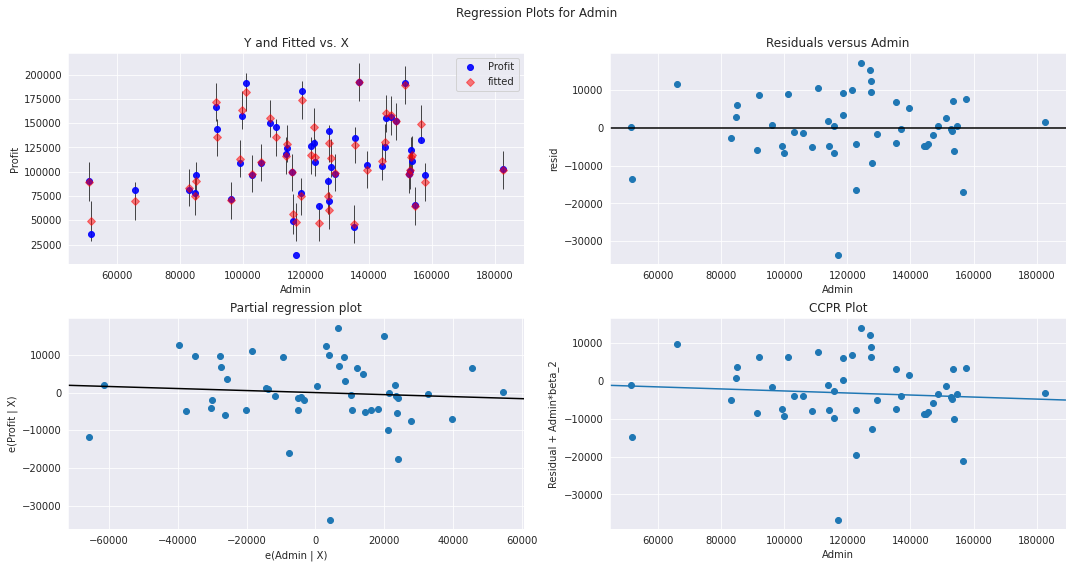

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'Admin', fig=fig)
plt.show()

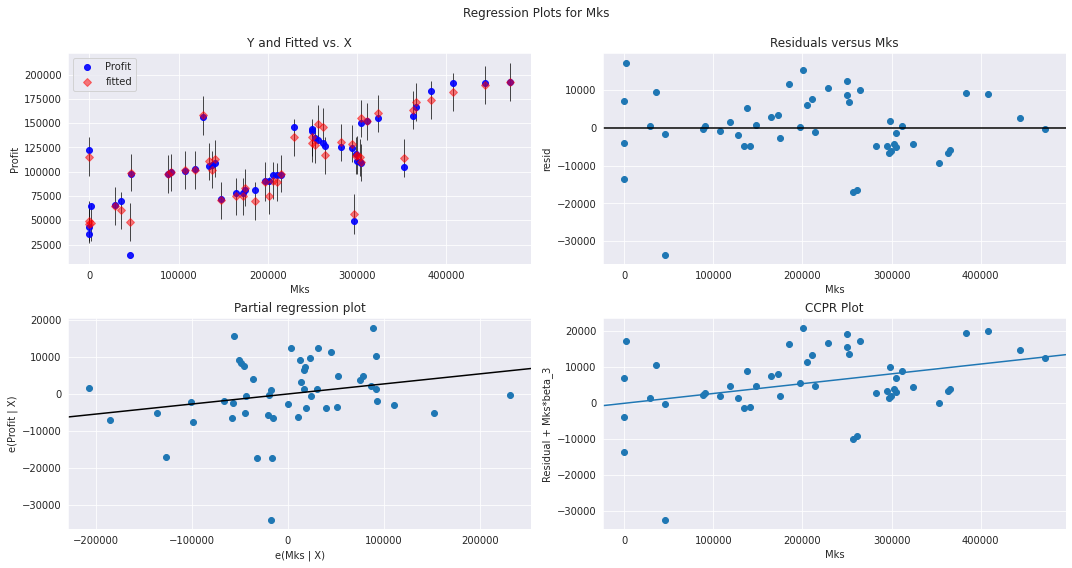

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'Mks', fig=fig)
plt.show()

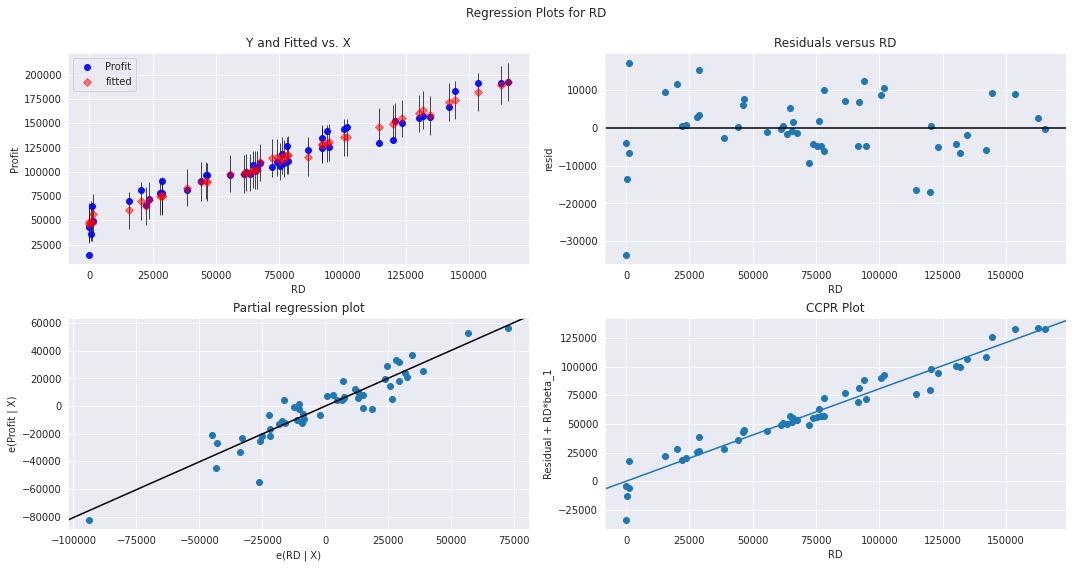

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'RD', fig=fig)
plt.show()

**Model Deletion Diagnostics (Detecting Influencers/Outliers)**
(1) Cook's Distance: 

In [ ]:
#If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


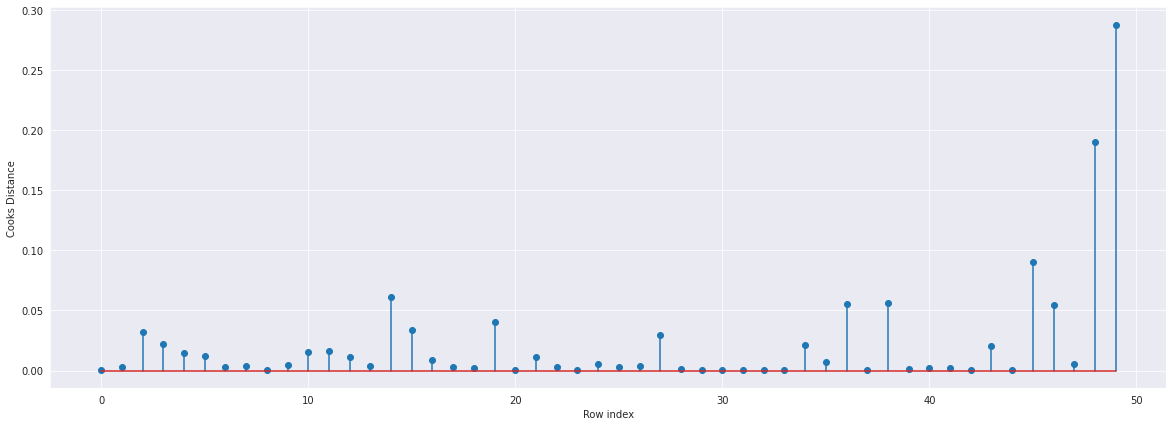

In [ ]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c,5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.2880822927543272)

**High influence points**

Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

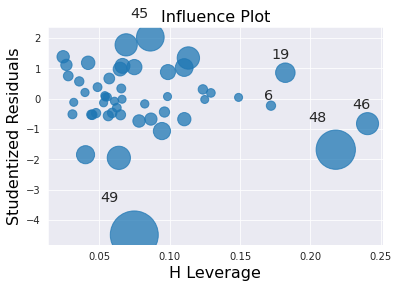

In [ ]:
import statsmodels.api as sm
sm.graphics.influence_plot(model)
plt.show()

Leverage Cuttoff Value = 3*(k+1)/n ; 

 k = no.of features/columns & n = no. of datapoints

In [ ]:
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.42

In [ ]:
#From the above plot, it is evident that data point 80 is the influencers , as it is crossing 0.36 point in influence plot

In [ ]:
data1[data1.index.isin([49])]

,RD,Admin,Mks,Profit,Predicted,Error
49,0.0,116983.8,45173.06,14681.4,48215.134111,-33533.734111


**Improving the model**

In [ ]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,RD,Admin,Mks,Profit,Predicted,Error
0,165349.20,136897.80,471784.10,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,166187.94,172139.514183,-5951.574183
5,131876.90,99814.71,362861.36,156991.12,163580.780571,-6589.660571
6,134615.46,147198.87,127716.82,156122.51,158114.096669,-1991.586669
7,130298.13,145530.06,323876.68,155752.60,160021.363048,-4268.763048
8,120542.52,148718.95,311613.29,152211.77,151741.699699,470.070301
9,123334.88,108679.17,304981.62,149759.96,154884.684110,-5124.724110


In [ ]:
model1=smf.ols("Profit~RD+Admin+Mks",data=data2).fit()

In [ ]:
model1.rsquared

0.9613162435129847

**Prediction**

In [ ]:
new_data=pd.DataFrame({'RD':65000,"Admin":80000,"Mks":125000},index=[0])
new_data

,RD,Admin,Mks
0,65000,80000,125000


In [ ]:
# Manual Prediction of Price
model1.predict(new_data)

0    104655.654686
dtype: float64

In [ ]:
pred_y=model1.predict(data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

**Table containing R^2 value for each prepared model**

In [ ]:
d1={'Prep_Models':['Model', 'Final_Model'], 'Rsquared':[model.rsquared,model1.rsquared]}
table=pd.DataFrame(d1)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316


# *METHOD2:By Using Sklearn*

In [ ]:
data3.head()

,RD,Admin,Mks,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
data3.keys()

Index(['RD', 'Admin', 'Mks', 'Profit'], dtype='object')

In [ ]:
X=data3.drop('Profit',axis=1)
Y=data3['Profit']
X.head()

,RD,Admin,Mks
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [ ]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=5)

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
model3=LinearRegression()
model3.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred_train=model3.predict(X_train) #actual ytrain
Y_pred_test=model3.predict(X_test)

In [ ]:
df=pd.DataFrame(Y_pred_test,Y_test)
df.head()

,0
Profit,
71498.49,72018.248209
101004.64,100157.395605
156122.51,156081.234496
122776.86,113428.684054
103282.38,98762.725737


In [ ]:
from sklearn.metrics import mean_squared_error
a=mean_squared_error(Y_test,Y_pred_test)
print(a)

46171532.61198317


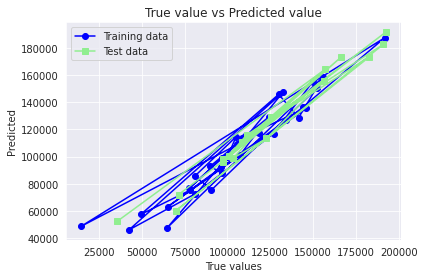

In [ ]:
plt.plot(Y_train ,Y_pred_train,c='blue',marker='o',label='Training data')

plt.plot(Y_test,Y_pred_test ,c='lightgreen',marker='s',label='Test data')

plt.xlabel('True values')

plt.ylabel('Predicted')

plt.title("True value vs Predicted value")

plt.legend(loc= 'upper left')

#plt.hlines(y=0,xmin=0,xmax=50)

plt.plot()

plt.show()

In [ ]:
model3.predict(new_data)

array([105355.72221085])

# **Question2:**
Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car

Price  -- Offer Price in EUROs

Age_08_04 -- Age in months as in August 2004	

Mfg_Month -- Manufacturing month (1-12)	

Mfg_Year	-- Manufacturing Year

KM -- Accumulated Kilometers on odometer

Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)

HP -- Horse Power

Met_Color	 -- Metallic Color?  (Yes=1, No=0)

Color -- Color (Blue, Red, Grey, Silver, Black, etc.)

Automatic	-- Automatic ( (Yes=1, No=0)

cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Cylinders	-- Number of cylinders

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms

Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)

BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)

Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)

Airbag_1 -- Driver_Airbag  (Yes=1, No=0)

Airbag_2 -- Passenger Airbag  (Yes=1, No=0)

Airco -- Airconditioning  (Yes=1, No=0)

Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)

Boardcomputer -- Boardcomputer  (Yes=1, No=0)

CD_Player -- CD Player  (Yes=1, No=0)

Central_Lock -- Central Lock  (Yes=1, No=0)

Powered_Windows -- Powered Windows  (Yes=1, No=0)

Power_Steering -- Power Steering  (Yes=1, No=0)

Radio -- Radio  (Yes=1, No=0)

Mistlamps	-- Mistlamps  (Yes=1, No=0)

Sport_Model -- Sport Model  (Yes=1, No=0)

Backseat_Divider -- Backseat Divider  (Yes=1, No=0)

Metallic_Rim --Metallic Rim  (Yes=1, No=0)

Radio_cassette -- Radio Cassette  (Yes=1, No=0)

Tow_Bar -- Tow Bar  (Yes=1, No=0)





In [ ]:
q2=pd.read_csv("/content/drive/MyDrive/Assignment/ToyotaCorolla.csv",encoding='windows-1254')
q2.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [ ]:
q2.tail()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,Green,0,1600,5,4,5,19,1114,0,0,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
q2.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

**EDA**

In [ ]:
q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
df = q2[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


**Check for null Values**

In [ ]:
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

Inference: The given table as zero non null values hence value imputation is not required

**Rename**

In [ ]:
df=df.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
df.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


**Duplicate Column**

In [ ]:
df[df.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
df1=df.drop_duplicates().reset_index(drop=True)
df1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


**Correlation Analysis**

In [ ]:
df1.corr

<bound method DataFrame.corr of       Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1430   7500   69  20544   86  1300      3      5   69    1025
1431  10845   72  19000   86  1300      3      5   69    1015
1432   8500   71  17016   86  1300      3      5   69    1015
1433   7250   70  16916   86  1300      3      5   69    1015
1434   6950   76      1  110  1600      5      5   19    1114

[1435 rows x 9 columns]>

Inference -> Age has strongest -ve corr with Price i.e if Age value increase then Price will decrease -> Gears and Price has medium +ve correlation -> Weight and Price has medium +ve correlation -> Age and KM has moderate +ve correlation -> Gears and KM has weak +ve correlation

**Scatterplot between variables along with histograms**

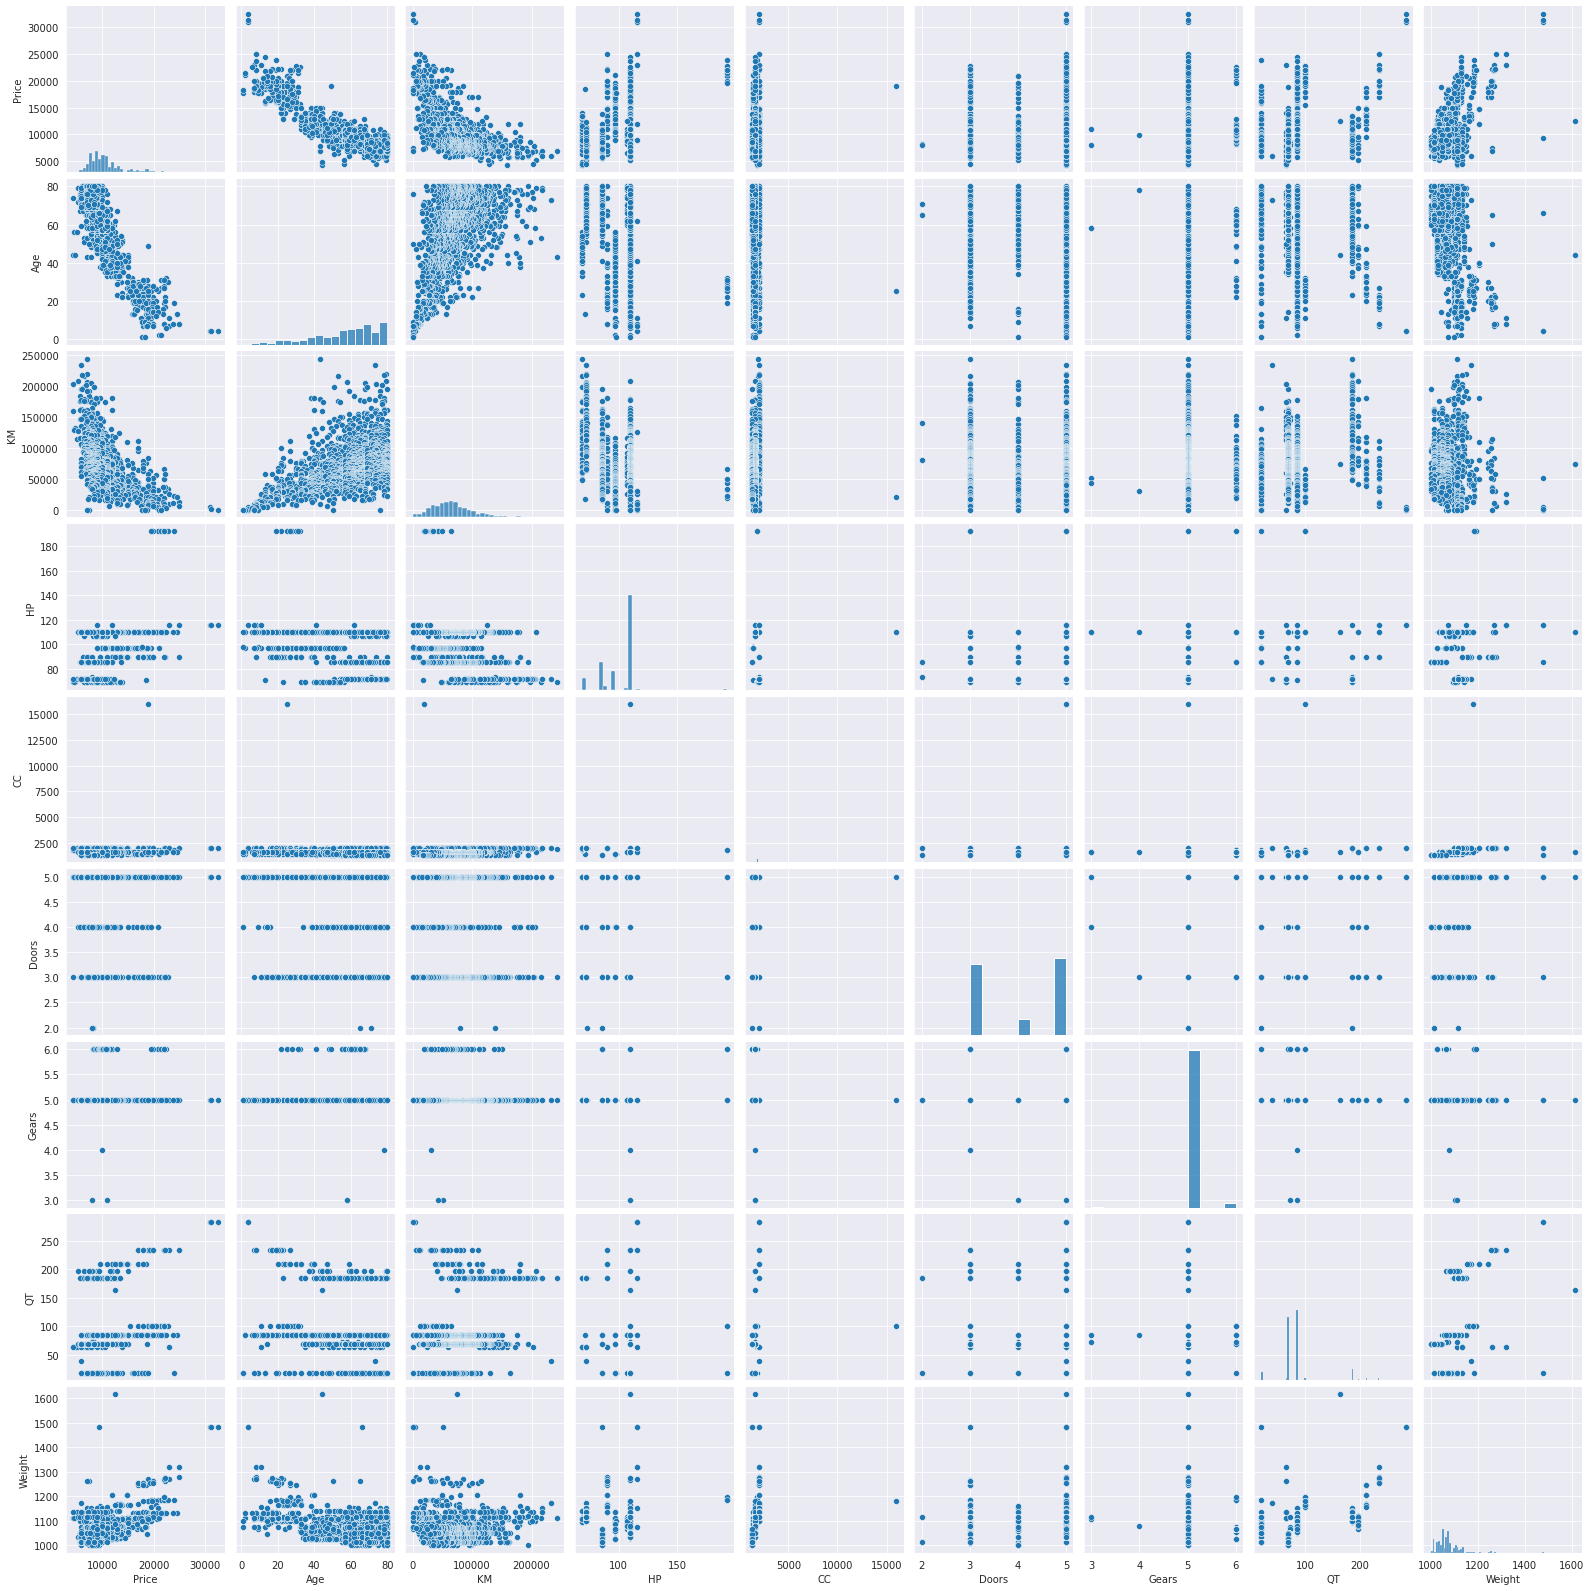

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


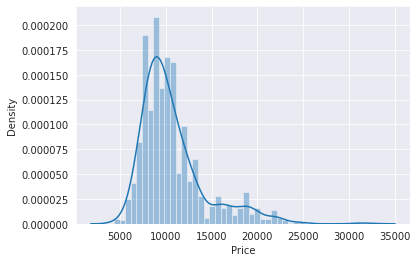

In [ ]:
#Visualization of data
sns.distplot(df1['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


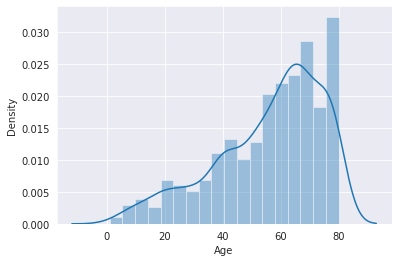

In [ ]:
#Visualization of data
sns.distplot(df1['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


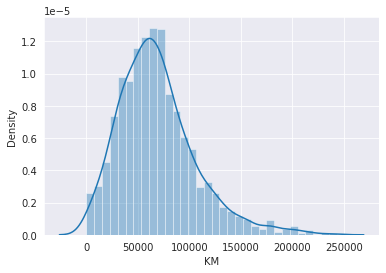

In [ ]:
sns.distplot(df['KM'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


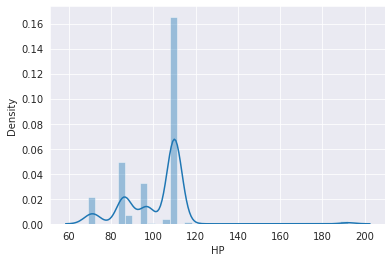

In [ ]:
sns.distplot(df['HP'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


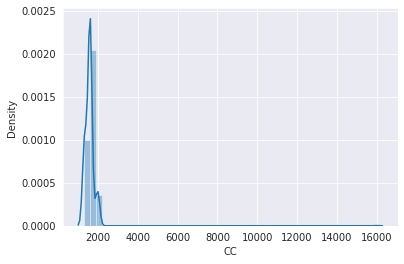

In [ ]:
sns.distplot(df['CC'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


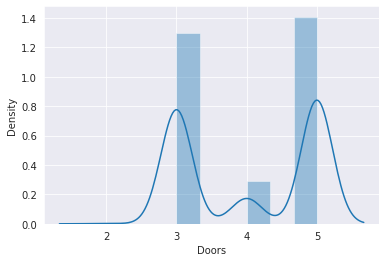

In [ ]:
sns.distplot(df['Doors'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


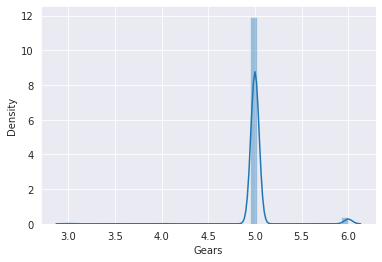

In [ ]:
sns.distplot(df['Gears'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


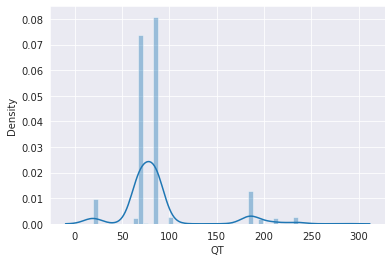

In [ ]:
sns.distplot(df['QT'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


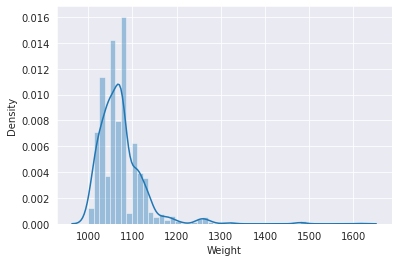

In [ ]:
sns.distplot(df['Weight'])

# **Method1:BY OLS**

**Preparing a model**

In [ ]:
model= smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df1).fit()
df3=df1.copy()

**Model Testing**

In [ ]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

Inference

To interpret Beta coefficient

Y=Price & X=Age,KM,HP,CC,Doors,Gears,QT,Weight

->Age - per unit increase in Age the Price will decrease by -121.713891 ->KM- per unit increase in KM the Price will decrease by -0.020737 ->CC- per unit increase in CC the Price will decrease by -0.118558 ->Doors- per unit increase in Doors the Price will decrease by -0.920189

->HP - per unit increase in HorsePower the Price will increase by 31.584612 ->Gears- per unit increase in Gears the Price will increase by 597.715894 ->QT- per unit increase in QT the Price will increase by 3.858805 ->Weight- per unit increase in Weight the Price will increase by 16.855470

**T-Value & P-Value**

In [ ]:
print(np.round(model.pvalues,5), '\n', np.round(model.tvalues,5))

Intercept    0.00011
Age          0.00000
KM           0.00000
HP           0.00000
CC           0.18824
Doors        0.98164
Gears        0.00245
QT           0.00329
Weight       0.00000
dtype: float64 
 Intercept    -3.87527
Age         -46.55188
KM          -16.55242
HP           11.20972
CC           -1.31644
Doors        -0.02301
Gears         3.03456
QT            2.94420
Weight       15.76066
dtype: float64


Inference
P-value
-> if p value<0.05 -> significant
-> if p value>0.05 -> insignificant

-> Doors has p-val =0.98164 >0.05 which is highly insignificant and least impactful
-> CC has p-val =0.18824 >0.05 which is insignificant and least impactful

-> Rest all variables has p-value <0.05 which is significant

(Doors) ------> INSIGNIFICANT
(Age,KM,HP,Gears,QT,Weight)------> SIGNIFICANT

In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)# Model accuracy is 86.17%

(0.8625200256947, 0.8617487495415146)

Simple Linear Regression Models
Build SLR and MLR models for insignificant variables 'CC' and 'Doors'
Also finding their tvalues and pvalues
SLR FOR Doors

In [ ]:
slr_d=smf.ols('Price~Doors',data = df1).fit() #Simple lR for each variables
#t and p-Values
print(round(slr_d.tvalues,5), '\n', round(slr_d.pvalues,5))

Intercept    19.42155
Doors         7.07052
dtype: float64 
 Intercept    0.0
Doors        0.0
dtype: float64


Inference: Doors has significant pvalue

In [ ]:
#SLR for Door & CC
ml_dc=smf.ols('Price~Doors+CC',data = df1).fit() 
#t and p-Values
print(round(ml_dc.tvalues,6), '\n', round(ml_dc.pvalues,6)) #result are significant

Intercept    12.786341
Doors         6.752236
CC            4.268006
dtype: float64 
 Intercept    0.000000
Doors        0.000000
CC           0.000021
dtype: float64


In [ ]:
ml_dc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           2.55e-15
Time:                        14:00:40   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
CC             0.9398      0.220      4.268      0.000       0.508       1.372
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Validation factor:Calculating VIF (Variance Inflation Factor)**

**(1) Collinearity Problem Check**

In [ ]:
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight', data=df1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight', data=df1).fit().rsquared
vif_KM=1/1-(rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=df1).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=df1).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=df1).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=df1).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,Vif
0,Age,1.876236
1,KM,0.569094
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


Inference None variable has VIF>20, No Collinearity, so consider all variables in Regression equation



**(2)Residual Analysis**

**Test for Normality of Residuals (Q-Q Plot)**

In [ ]:
model.rsquared

0.8625200256947

In [ ]:
model.resid #Errors

0      -3291.958871
1      -2503.800414
2      -2829.635210
3      -1455.789389
4      -2450.217277
           ...     
1430   -1294.255037
1431    2552.422658
1432      44.565598
1433   -1329.222041
1434   -3446.087526
Length: 1435, dtype: float64

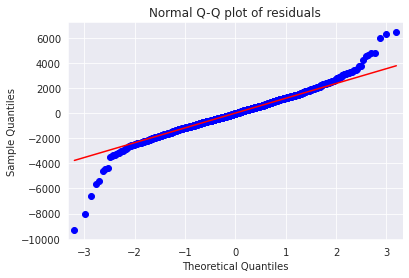

In [ ]:
qqplot=sm.qqplot(model4.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid>6000))# outlier detection from above QQ plot of residuals

[array([109, 146, 522])]

In [ ]:
list(np.where(model.resid<-6000))# outlier detection below -6000

[array([220, 600, 959])]

In [ ]:
df1['Predicted']= model4.fittedvalues  #Predicted Value
df1['Error']= model4.resid             #Errors
df1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight,Predicted,Error
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,-3291.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,-2503.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,-2829.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,-1455.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,-2450.217277
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025,8794.255037,-1294.255037
1431,10845,72,19000,86,1300,3,5,69,1015,8292.577342,2552.422658
1432,8500,71,17016,86,1300,3,5,69,1015,8455.434402,44.565598
1433,7250,70,16916,86,1300,3,5,69,1015,8579.222041,-1329.222041


**BoxPlot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


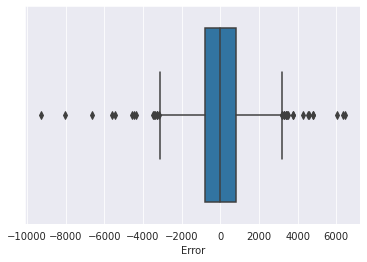

In [ ]:
sns.boxplot(df1['Error'])

**Histogram**

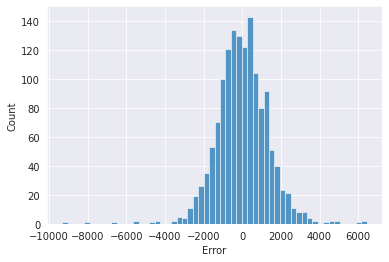

In [ ]:
sns.histplot(df1['Error'])

**Residual Plot for Homoscedasticity**

In [ ]:
#Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

In [ ]:
def standard_values(vals): 
    return(vals-vals.mean())/vals.std() # User defined z = (x - mu)/sigma

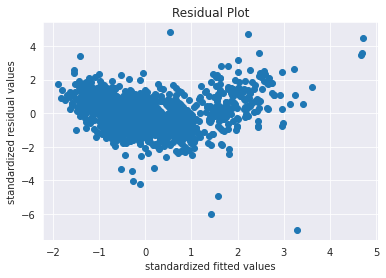

In [ ]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In the above scatter plot of fitted and residual values -->no pattern -->0 correlation Same is the case here, hence it is a good model.




**Residual Vs Regressors**

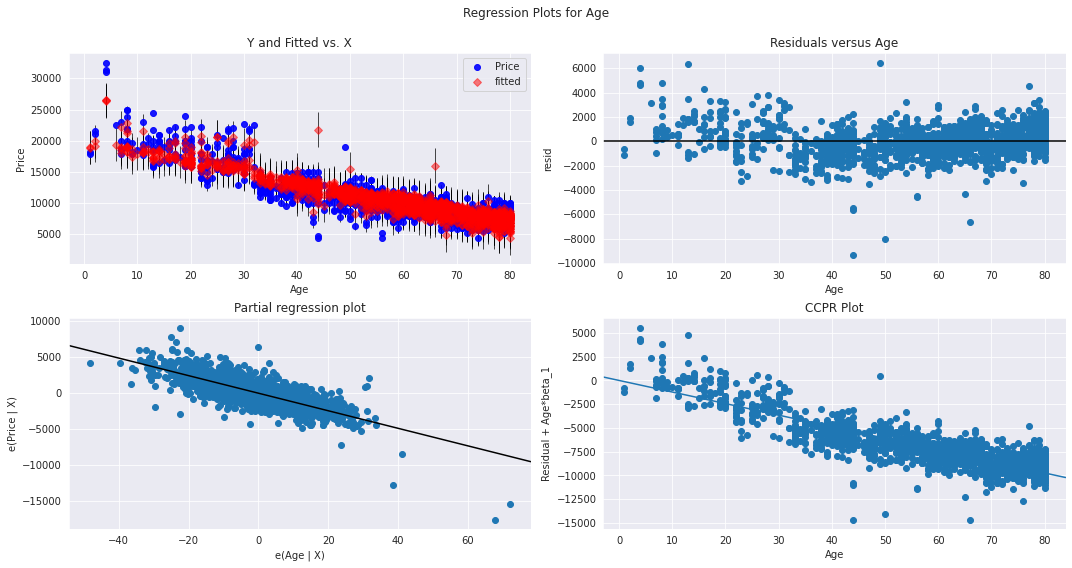

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'Age', fig=fig)
plt.show()

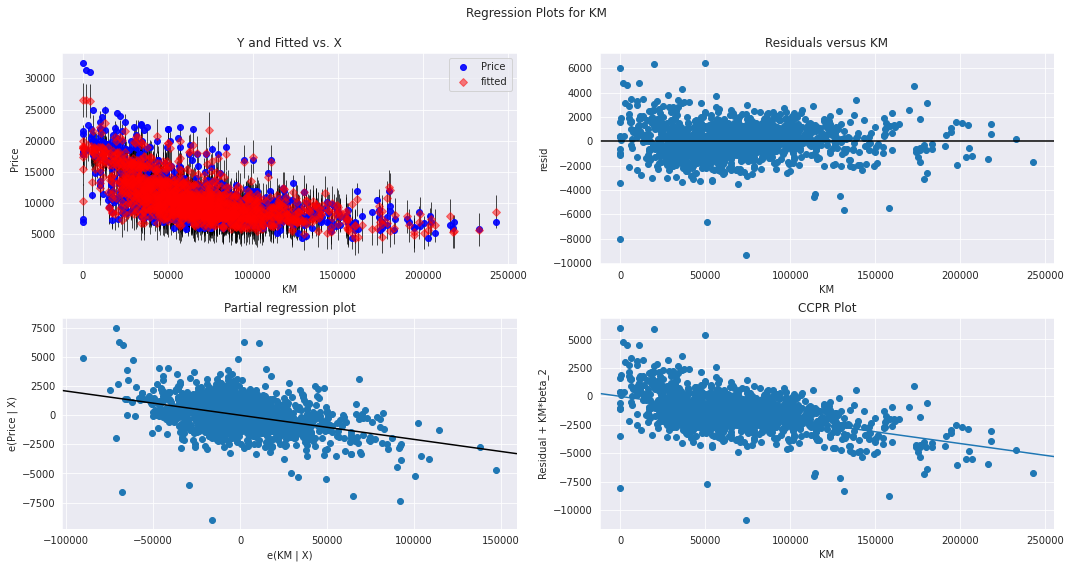

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'KM', fig=fig)
plt.show()

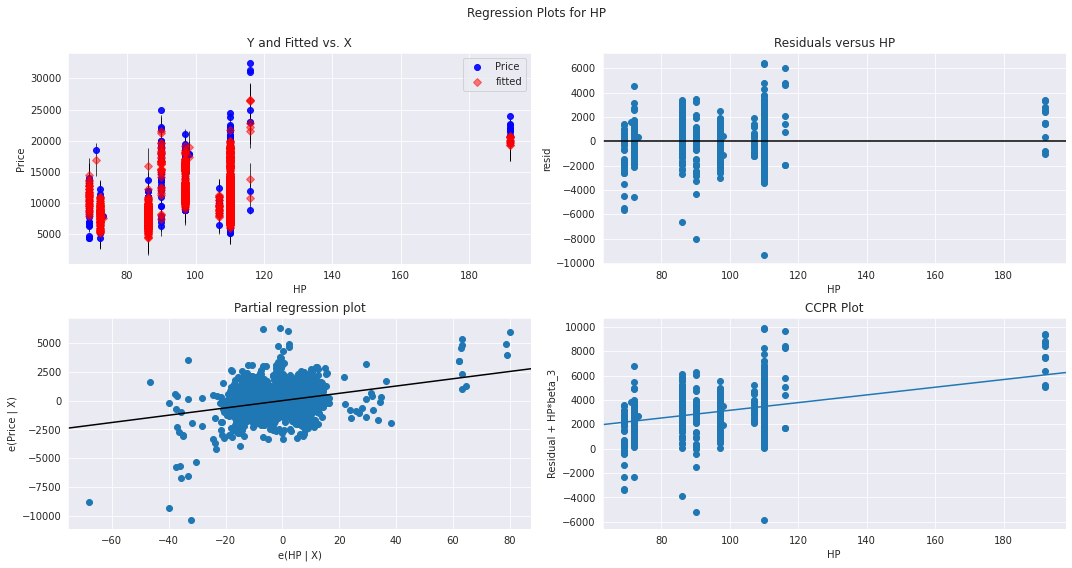

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

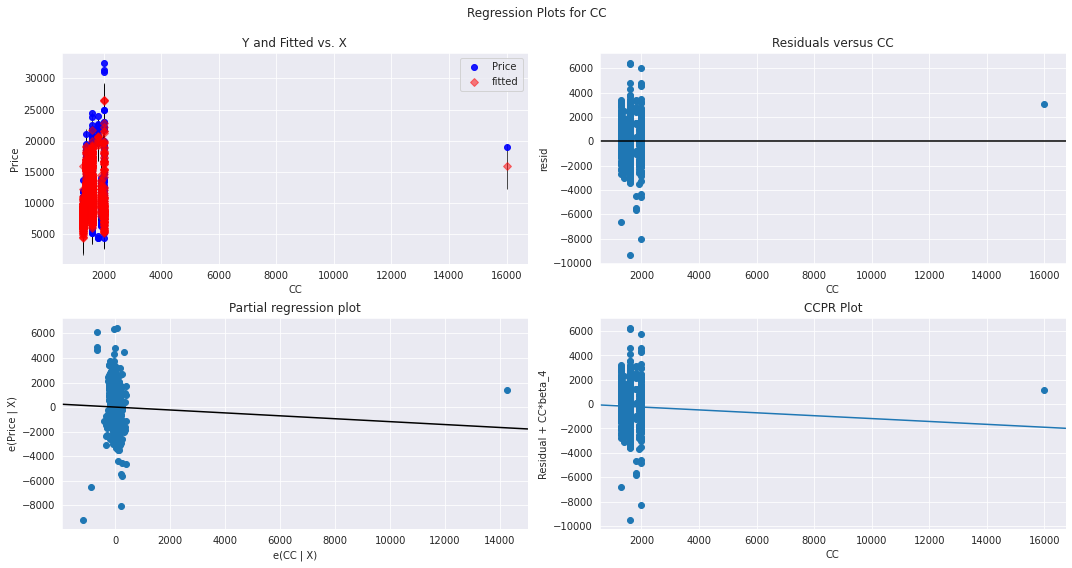

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'CC', fig=fig)
plt.show()

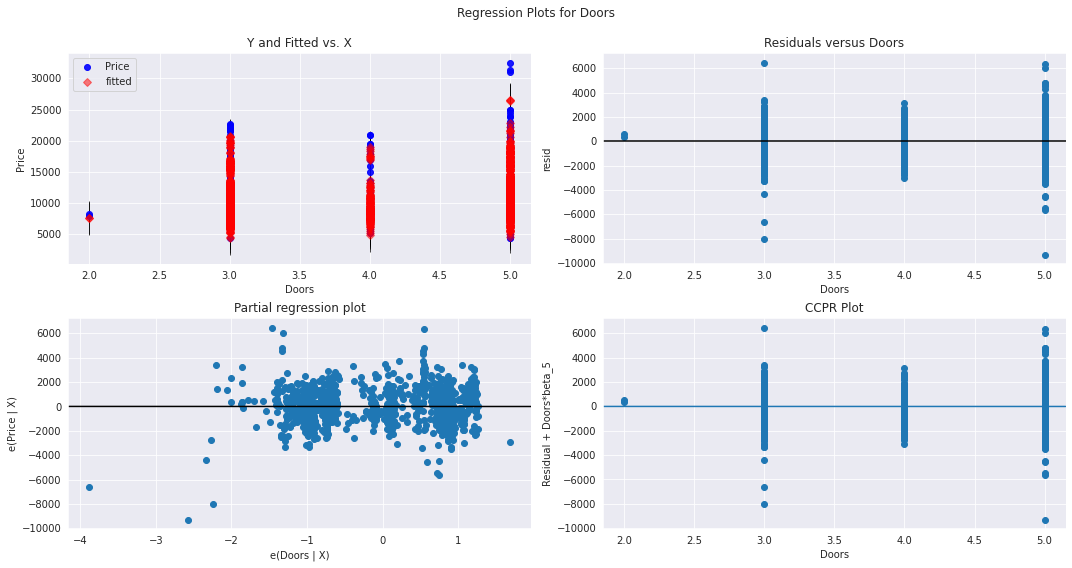

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'Doors', fig=fig)
plt.show()

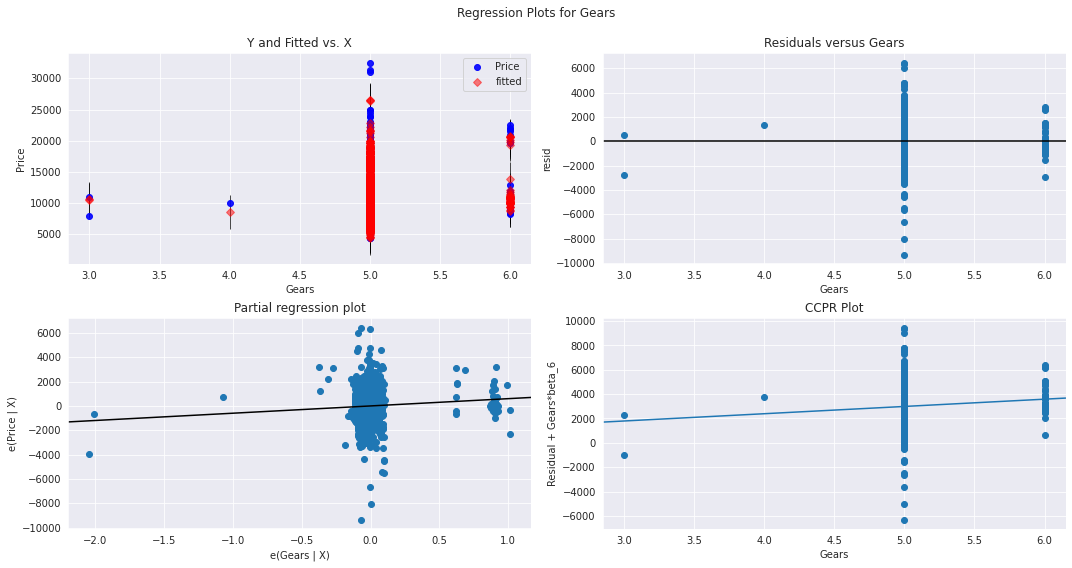

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

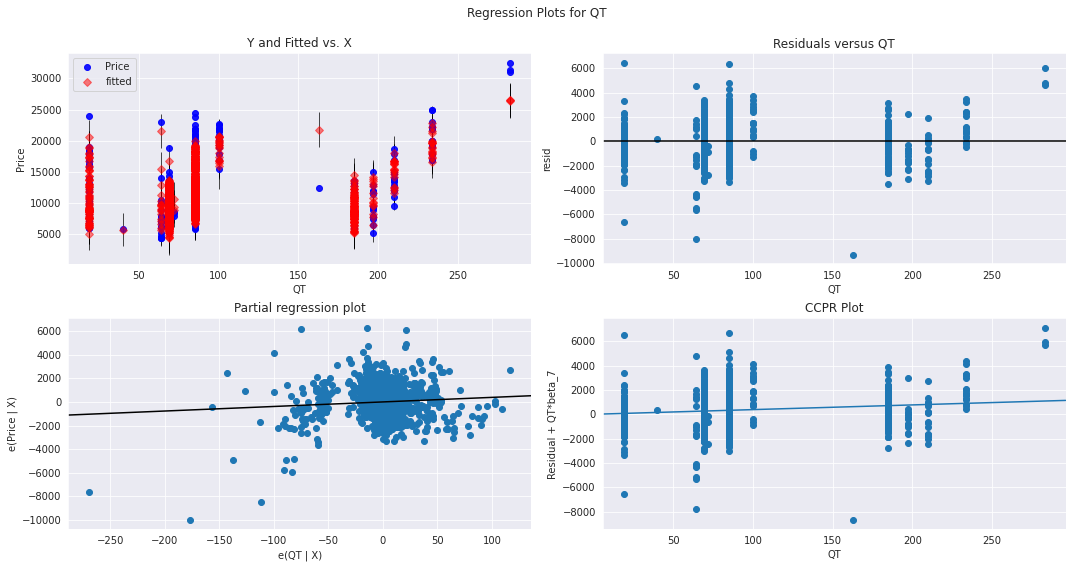

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'QT', fig=fig)
plt.show()

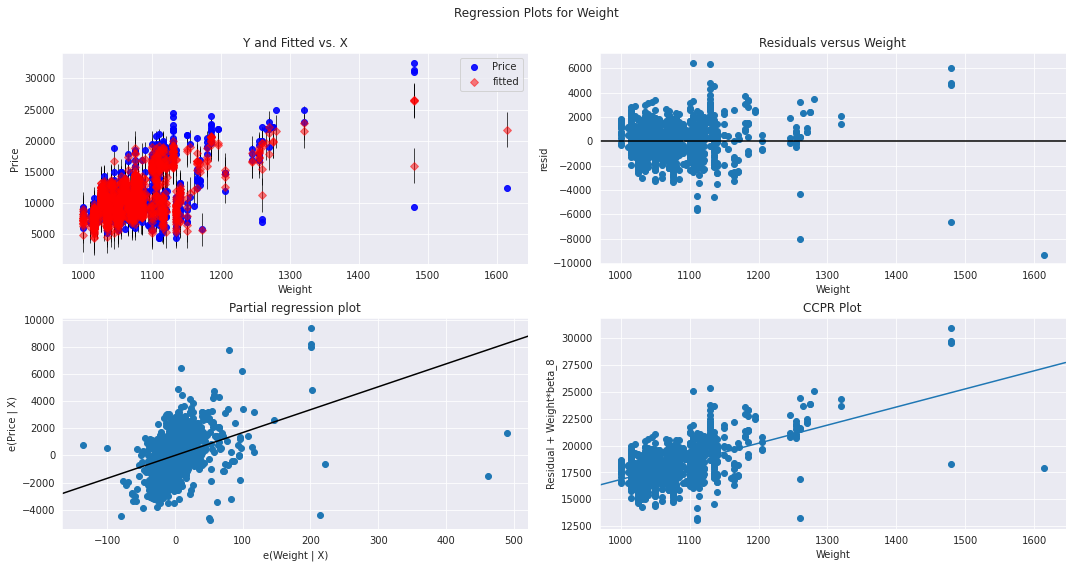

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'Weight', fig=fig)
plt.show()

**Model Deletion Diagnostics (Detecting Influencers/Outliers)**



(1) Cook's Distance:




**If Cook's distance > 1, then it's an outlier**

In [ ]:
# Get influencers using cook's distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


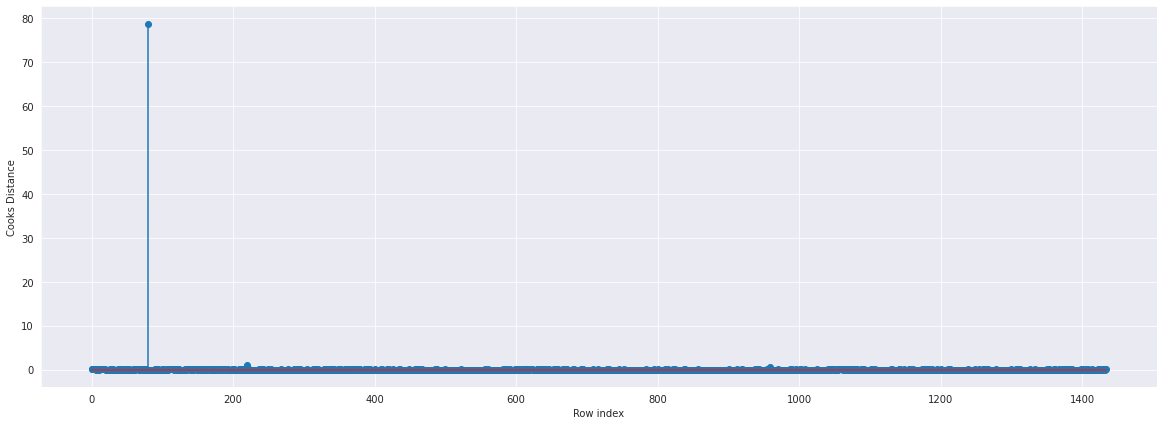

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

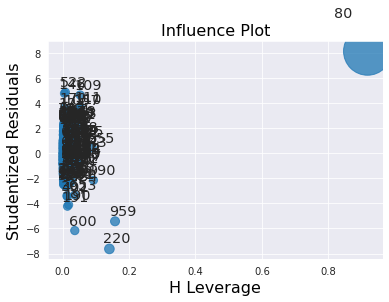

In [ ]:
import statsmodels.api as sm
sm.graphics.influence_plot(model4)
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c)) #argmax returns index of highest value

(80, 78.72950582259465)

In [ ]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df1.shape[1]
n=df1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.025087108013937282

In [ ]:
#From the above plot, it is evident that data point 80 is the influencers , as it is crossing 0.020905 point in influence plot

In [ ]:
df1[df1.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight,Predicted,Error
80,18950,25,20019,110,16000,5,5,100,1180,15906.167549,3043.832451


**Improving Model**

In [ ]:
#Load the data
df_new = df1.copy()
df_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight,Predicted,Error
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,-3291.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,-2503.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,-2829.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,-1455.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,-2450.217277
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025,8794.255037,-1294.255037
1431,10845,72,19000,86,1300,3,5,69,1015,8292.577342,2552.422658
1432,8500,71,17016,86,1300,3,5,69,1015,8455.434402,44.565598
1433,7250,70,16916,86,1300,3,5,69,1015,8579.222041,-1329.222041


In [ ]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True)) 
df2=df_new.drop(df_new.index[[80]],axis=0).reset_index(drop=True)
df2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight,Predicted,Error
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,-3291.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,-2503.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,-2829.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,-1455.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,-2450.217277
...,...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025,8794.255037,-1294.255037
1430,10845,72,19000,86,1300,3,5,69,1015,8292.577342,2552.422658
1431,8500,71,17016,86,1300,3,5,69,1015,8455.434402,44.565598
1432,7250,70,16916,86,1300,3,5,69,1015,8579.222041,-1329.222041


In [ ]:
while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df2=df2.drop(df2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df2
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [ ]:
final_model.rsquared

0.8882395145171204

Model Predictions

In [ ]:
new_data=pd.DataFrame({'Age':10,"KM":45000,"HP":90,"CC":1100,"Doors":4,"Gears":5,"QT":79,"Weight":1500},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,10,45000,90,1100,4,5,79,1500


In [ ]:
final_model.predict(new_data)

0    31269.319492
dtype: float64

In [ ]:
d_fin={'Prep_Models':['Model', 'Final_Model'], 'Rsquared':[model.rsquared, final_model.rsquared]}
table=pd.DataFrame(d_fin)
table

,Prep_Models,Rsquared
0,Model,0.883968
1,Final_Model,0.888240


In [ ]:
final_model.rsquared

0.8882395145171204

# *Method2:BY SKLEARN* 

In [ ]:
df3.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
X=df3.drop('Price',axis=1)
Y=df3['Price']
print(X.head)


<bound method NDFrame.head of       Age     KM   HP    CC  Doors  Gears   QT  Weight
0      23  46986   90  2000      3      5  210    1165
1      23  72937   90  2000      3      5  210    1165
2      24  41711   90  2000      3      5  210    1165
3      26  48000   90  2000      3      5  210    1165
4      30  38500   90  2000      3      5  210    1170
...   ...    ...  ...   ...    ...    ...  ...     ...
1430   69  20544   86  1300      3      5   69    1025
1431   72  19000   86  1300      3      5   69    1015
1432   71  17016   86  1300      3      5   69    1015
1433   70  16916   86  1300      3      5   69    1015
1434   76      1  110  1600      5      5   19    1114

[1435 rows x 8 columns]>


In [ ]:
print(Y.head)

<bound method NDFrame.head of 0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1430     7500
1431    10845
1432     8500
1433     7250
1434     6950
Name: Price, Length: 1435, dtype: int64>


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=5)

In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred_train=model.predict(X_train) #actual ytrain
Y_pred_test=model.predict(X_test) #actual ytest

In [ ]:
df=pd.DataFrame(Y_pred_test,Y_test)
df.head()

,0
Price,
6950,6341.880198
8750,10173.304742
15500,16643.066918
12950,12712.579242
8500,6556.930616


In [ ]:
model.predict(new_data)

array([32861.89883949])

In [ ]:
pred_y=final_model.predict(df3)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1430     9161.230587
1431     8536.091326
1432     8681.531063
1433     8793.668694
1434    10860.695492
Length: 1435, dtype: float64

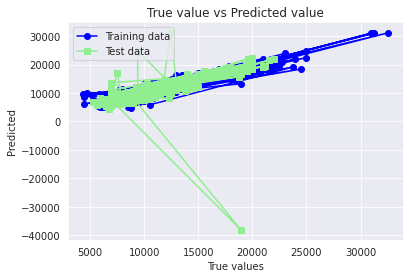

In [ ]:
plt.plot(Y_train ,Y_pred_train,c='blue',marker='o',label='Training data')

plt.plot(Y_test,Y_pred_test ,c='lightgreen',marker='s',label='Test data')

plt.xlabel('True values')

plt.ylabel('Predicted')

plt.title("True value vs Predicted value")

plt.legend(loc= 'upper left')

#plt.hlines(y=0,xmin=0,xmax=50)

plt.plot()

plt.show()

In [ ]:
#The mean squared error
print("Mean squared error: %.2f" % np.mean((model.predict(X_test) - Y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(X_test, Y_test))

Mean squared error: 9673103.85
Variance score: -0.02
